# Apredizaje y generalización

Keras también nos ayuda a entrenar redes que sean capaces de generalizar de manera muy  simple. En este laboratorio usaremos un conjunto de entrenamiento (train) y otro conjunto diferente de prueba o validación (test). La idea es que entrenaremos con uno y evaluaremos el desempeño de nuestra red en el otro.

También veremos cómo la regularización ayuda a mejorar la generalización.

In [1]:
# Importamos librerías necesarias

from tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
# Cargamos datos de entrenamiento y prueba de CIFAR10

(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

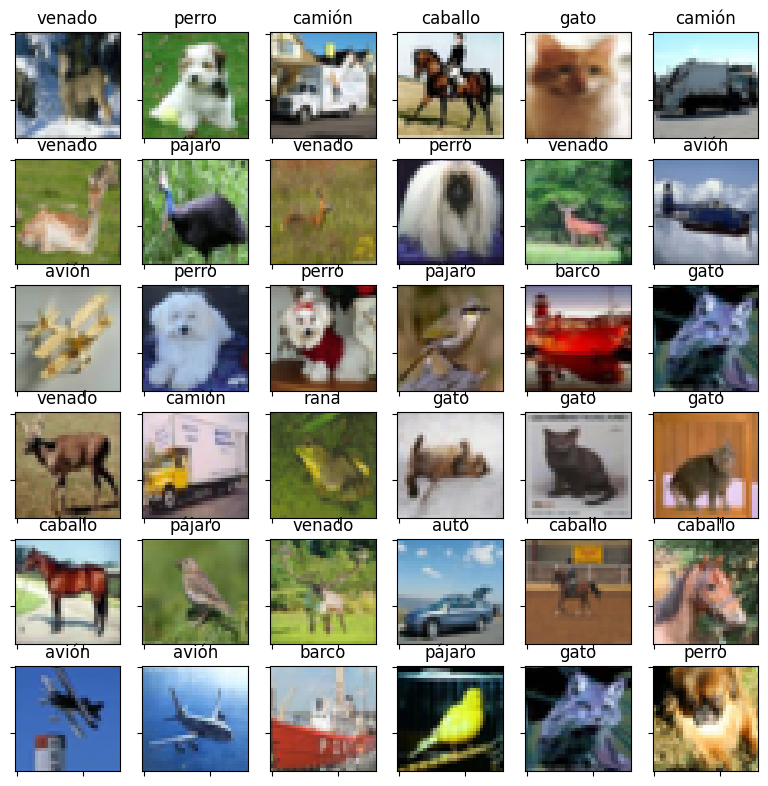

In [4]:
# Mostramos una grilla de ejemplos (al azar) del conjunto de test

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_test))
    axs[i,j].set_title(nombres[labs_test[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_test[ex])

In [5]:
# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [6]:
# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

3072 10 50000 10000


In [17]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)


# Creamos nuestra red feed-forward (tiene 4 capas escondidas!)

h1 = 512
h2 = 256
h3 = 128

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1773066 (6.76 MB)
Trainable params: 1773066 (6.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
hist = red.fit(X_train, Y_train,
        epochs=150,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )

Epoch 1/150
391/391 [==============================] - 3s 6ms/step - loss: 2.0063 - accuracy: 0.2838 - val_loss: 1.8564 - val_accuracy: 0.3449
Epoch 2/150
391/391 [==============================] - 2s 5ms/step - loss: 1.8197 - accuracy: 0.3538 - val_loss: 1.7796 - val_accuracy: 0.3651
Epoch 3/150
391/391 [==============================] - 2s 4ms/step - loss: 1.7440 - accuracy: 0.3862 - val_loss: 1.7133 - val_accuracy: 0.3878
Epoch 4/150
391/391 [==============================] - 2s 4ms/step - loss: 1.6887 - accuracy: 0.4042 - val_loss: 1.6985 - val_accuracy: 0.4029
Epoch 5/150
391/391 [==============================] - 2s 4ms/step - loss: 1.6494 - accuracy: 0.4187 - val_loss: 1.6233 - val_accuracy: 0.4274
Epoch 6/150
391/391 [==============================] - 2s 5ms/step - loss: 1.6130 - accuracy: 0.4322 - val_loss: 1.6215 - val_accuracy: 0.4181
Epoch 7/150
391/391 [==============================] - 2s 5ms/step - loss: 1.5836 - accuracy: 0.4414 - val_loss: 1.5842 - val_accuracy: 0.4362

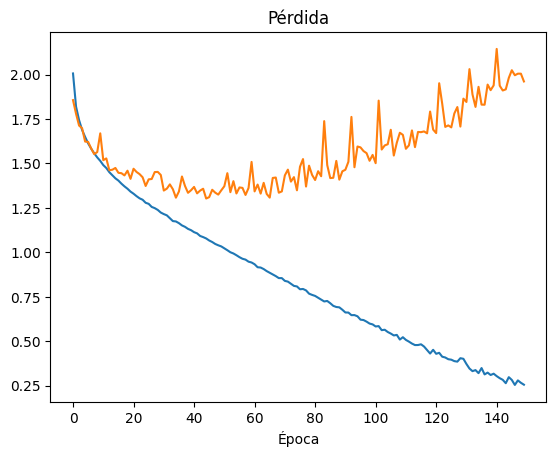

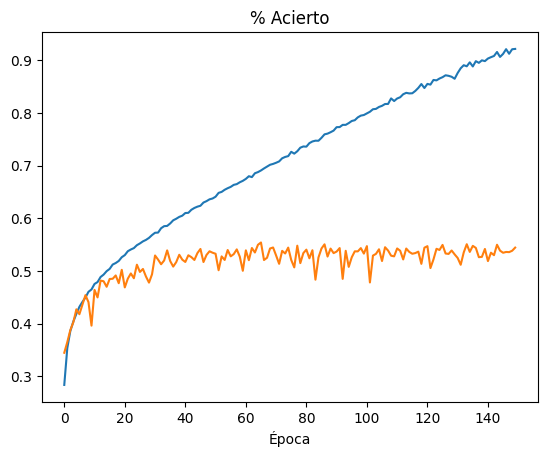

In [19]:
# Mostramos la pérdida y el acierto por cada época


#Este grafico (el primero) muestra en el grafico azul la funcion de costo (si decrementa es pq está aprendiendo) de los datos de train
#muestra en el grafico naranjo la funcion de costo (si decrementa es pq está aprendiendo) de los datos de test

#Costo de train decrementa, costo de test aumenta, esto es indicio de overfitting (memorización de test)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()